In [7]:
#Importing packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import dump,load
from sklearn import metrics
import warnings

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

%matplotlib inline
pd.options.display.float_format = '{:.4f}'.format
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

## Variable Conventions

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
emp_df = pd.read_csv("/content/drive/MyDrive/Mini Project 2/HR_Employee_Attrition.csv")

In [9]:
emp_df.shape

(1470, 35)

In [ ]:
emp_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## Setting Employee Number as Index

In [ ]:
emp_df.set_index('EmployeeNumber',inplace=True)

In [ ]:
emp_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## Checking Imbalance in the data set

In [ ]:
emp_df['Attrition'].value_counts()/len(emp_df)*100

No    83.8776
Yes   16.1224
Name: Attrition, dtype: float64

## Checking the data types of features

In [ ]:
emp_df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYea

## Changing target variable to numeric

In [ ]:
emp_df['Attrition'].replace({"Yes":1,"No":0},inplace=True)

In [ ]:
emp_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
2,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
4,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
5,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
7,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
emp_df['Attrition'].value_counts()/len(emp_df)*100

0   83.8776
1   16.1224
Name: Attrition, dtype: float64

## Missing Value check

In [ ]:
emp_df.isna().mean()

Age                        0.0000
Attrition                  0.0000
BusinessTravel             0.0000
DailyRate                  0.0000
Department                 0.0000
DistanceFromHome           0.0000
Education                  0.0000
EducationField             0.0000
EmployeeCount              0.0000
EnvironmentSatisfaction    0.0000
Gender                     0.0000
HourlyRate                 0.0000
JobInvolvement             0.0000
JobLevel                   0.0000
JobRole                    0.0000
JobSatisfaction            0.0000
MaritalStatus              0.0000
MonthlyIncome              0.0000
MonthlyRate                0.0000
NumCompaniesWorked         0.0000
Over18                     0.0000
OverTime                   0.0000
PercentSalaryHike          0.0000
PerformanceRating          0.0000
RelationshipSatisfaction   0.0000
StandardHours              0.0000
StockOptionLevel           0.0000
TotalWorkingYears          0.0000
TrainingTimesLastYear      0.0000
WorkLifeBalanc

## Column type identification

In [ ]:
emp_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
2,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
4,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
5,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
7,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
nominal_cols = ['Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']

ordinal_cols = ['BusinessTravel','Education','EnvironmentSatisfaction','JobInvolvement','JobLevel','JobSatisfaction',
               'PerformanceRating','RelationshipSatisfaction','StockOptionLevel','WorkLifeBalance']

numeric_cols = ['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome', 'MonthlyRate','NumCompaniesWorked',
               'PercentSalaryHike','StandardHours','TotalWorkingYears', 'TrainingTimesLastYear','YearsAtCompany',
               'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager','EmployeeCount']

target_cols = ['Attrition']

In [ ]:
len(nominal_cols)+len(ordinal_cols)+len(numeric_cols)+len(target_cols)

34

## Checking for standard deviation and unique values

In [ ]:
cols = []
sd_counts = []
dtype = []
for col in emp_df.columns:
    cols.append(col)
    if emp_df[col].dtypes == 'object':
        sd_counts.append(emp_df[col].nunique())
        dtype.append('object')
    else :
        sd_counts.append(emp_df[col].std())
        dtype.append('numeric')
        
sd_df = pd.DataFrame(list(zip(cols,dtype,sd_counts)),columns=['Columns','DataType','sd_counts'])    
sd_df.sort_values(by=['DataType','sd_counts'])

,Columns,DataType,sd_counts
8,EmployeeCount,numeric,0.0000
25,StandardHours,numeric,0.0000
23,PerformanceRating,numeric,0.3608
1,Attrition,numeric,0.3679
29,WorkLifeBalance,numeric,0.7065
12,JobInvolvement,numeric,0.7116
26,StockOptionLevel,numeric,0.8521
6,Education,numeric,1.0242
24,RelationshipSatisfaction,numeric,1.0812
9,EnvironmentSatisfaction,numeric,1.0931


## Deleting 0 standard deviation or 1 Unique Values columns

In [ ]:
emp_df.drop(columns=['EmployeeCount','StandardHours','Over18'],inplace=True)

In [ ]:
numeric_cols.remove('EmployeeCount')
numeric_cols.remove('StandardHours')
nominal_cols.remove('Over18')

In [ ]:
emp_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
2,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
4,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
5,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
7,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


## Information Values Check

In [ ]:
def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})

        
        # Calculate the number of events in each group (bin)
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        
        # Calculate % of events in each group.
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()

        # Calculate the non events in each group.
        d['Non-Events'] = d['N'] - d['Events']
        # Calculate % of non events in each group.
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()

        # Calculate WOE by taking natural log of division of % of non-events and % of events
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        #print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

In [ ]:
pd.options.display.max_rows = 50

In [ ]:
iv_woe(data=emp_df,target='Attrition')[0]

,Variable,IV
0,Age,0.3107
0,BusinessTravel,0.1209
0,DailyRate,0.0769
0,Department,0.0522
0,DistanceFromHome,0.0765
0,Education,0.0165
0,EducationField,0.0728
0,EnvironmentSatisfaction,0.0999
0,Gender,0.0065
0,HourlyRate,0.0532


In [ ]:
iv_woe(data=emp_df,target='Attrition')[1]

,Variable,Cutoff,N,Events,% of Events,Non-Events,% of Non-Events,WoE,IV
0,Age,"(17.999, 26.0]",162,56,0.2363,106,0.0860,1.0111,0.1520
1,Age,"(26.0, 29.0]",164,35,0.1477,129,0.1046,0.3447,0.0148
2,Age,"(29.0, 31.0]",129,27,0.1139,102,0.0827,0.3200,0.0100
3,Age,"(31.0, 34.0]",196,32,0.1350,164,0.1330,0.0150,0.0000
4,Age,"(34.0, 36.0]",147,16,0.0675,131,0.1062,-0.4535,0.0176
...,...,...,...,...,...,...,...,...,...
2,YearsWithCurrManager,"(2.0, 3.0]",142,19,0.0802,123,0.0998,-0.2186,0.0043
3,YearsWithCurrManager,"(3.0, 4.0]",98,11,0.0464,87,0.0706,-0.4189,0.0101
4,YearsWithCurrManager,"(4.0, 7.0]",276,39,0.1646,237,0.1922,-0.1554,0.0043
5,YearsWithCurrManager,"(7.0, 9.0]",171,16,0.0675,155,0.1257,-0.6217,0.0362


In [ ]:
iv_results = iv_woe(emp_df,'Attrition')[0]

In [ ]:
iv_results

,Variable,IV
0,Age,0.3107
0,BusinessTravel,0.1209
0,DailyRate,0.0769
0,Department,0.0522
0,DistanceFromHome,0.0765
0,Education,0.0165
0,EducationField,0.0728
0,EnvironmentSatisfaction,0.0999
0,Gender,0.0065
0,HourlyRate,0.0532


In [ ]:
iv_results.sort_values(by='IV')

,Variable,IV
0,PerformanceRating,0.0001
0,Gender,0.0065
0,YearsSinceLastPromotion,0.0164
0,Education,0.0165
0,RelationshipSatisfaction,0.0245
0,PercentSalaryHike,0.0440
0,Department,0.0522
0,HourlyRate,0.0532
0,MonthlyRate,0.0541
0,WorkLifeBalance,0.0670


In [ ]:
pd.crosstab(emp_df['PerformanceRating'],emp_df['Attrition'])

Attrition,0,1
PerformanceRating,,
3,1044,200
4,189,37


In [ ]:
pd.crosstab(emp_df['PerformanceRating'],emp_df['Attrition'],normalize='index')*100

Attrition,0,1
PerformanceRating,,
3,83.9228,16.0772
4,83.6283,16.3717


In [ ]:
pd.crosstab(emp_df['JobRole'],emp_df['Attrition'],normalize='index')*100

Attrition,0,1
JobRole,,
Healthcare Representative,93.1298,6.8702
Human Resources,76.9231,23.0769
Laboratory Technician,76.0618,23.9382
Manager,95.0980,4.9020
Manufacturing Director,93.1034,6.8966
Research Director,97.5000,2.5000
Research Scientist,83.9041,16.0959
Sales Executive,82.5153,17.4847
Sales Representative,60.2410,39.7590


In [ ]:
low_iv_vars = list(iv_results[iv_results['IV']<0.02]['Variable'])
low_iv_vars

['Education', 'Gender', 'PerformanceRating', 'YearsSinceLastPromotion']

## Dropping low IV values columns

In [ ]:
emp_df.drop(columns=low_iv_vars,inplace=True)

In [ ]:
nominal_cols = [x for x in nominal_cols if x not in low_iv_vars]
ordinal_cols = [x for x in ordinal_cols if x not in low_iv_vars]
numeric_cols = [x for x in numeric_cols if x not in low_iv_vars]

In [ ]:
emp_df.shape

(1470, 27)

In [ ]:
len(nominal_cols)+len(ordinal_cols)+len(numeric_cols)+len(target_cols)

27

## Ordinal Variable Treatment

In [ ]:
ordinal_cols

['BusinessTravel',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'WorkLifeBalance']

In [ ]:
emp_df[ordinal_cols]

,BusinessTravel,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance
EmployeeNumber,,,,,,,,
1,Travel_Rarely,2,3,2,4,1,0,1
2,Travel_Frequently,3,2,2,2,4,1,3
4,Travel_Rarely,4,2,1,3,2,0,3
5,Travel_Frequently,4,3,1,3,3,0,3
7,Travel_Rarely,1,3,1,2,4,1,3
...,...,...,...,...,...,...,...,...
2061,Travel_Frequently,3,4,2,4,3,1,3
2062,Travel_Rarely,4,2,3,1,1,1,3
2064,Travel_Rarely,2,4,2,2,2,1,3


In [ ]:
emp_df['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [ ]:
emp_df['BusinessTravel'].replace({'Non-Travel':0,'Travel_Rarely':1,'Travel_Frequently':2},inplace=True)

In [ ]:
emp_df[ordinal_cols]

,BusinessTravel,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance
EmployeeNumber,,,,,,,,
1,1,2,3,2,4,1,0,1
2,2,3,2,2,2,4,1,3
4,1,4,2,1,3,2,0,3
5,2,4,3,1,3,3,0,3
7,1,1,3,1,2,4,1,3
...,...,...,...,...,...,...,...,...
2061,2,3,4,2,4,3,1,3
2062,1,4,2,3,1,1,1,3
2064,1,2,4,2,2,2,1,3


## Nominal column treatment

In [ ]:
nominal_cols

['Department', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime']

In [ ]:
emp_df[nominal_cols]

,Department,EducationField,JobRole,MaritalStatus,OverTime
EmployeeNumber,,,,,
1,Sales,Life Sciences,Sales Executive,Single,Yes
2,Research & Development,Life Sciences,Research Scientist,Married,No
4,Research & Development,Other,Laboratory Technician,Single,Yes
5,Research & Development,Life Sciences,Research Scientist,Married,Yes
7,Research & Development,Medical,Laboratory Technician,Married,No
...,...,...,...,...,...
2061,Research & Development,Medical,Laboratory Technician,Married,No
2062,Research & Development,Medical,Healthcare Representative,Married,No
2064,Research & Development,Life Sciences,Manufacturing Director,Married,Yes


In [ ]:
from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder(sparse=False,handle_unknown='ignore',dtype=int,drop='first')
oh.fit(emp_df[nominal_cols])
oh_df = pd.DataFrame(oh.transform(emp_df[nominal_cols]),columns=oh.get_feature_names(nominal_cols),index=emp_df.index)
oh_df

,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
EmployeeNumber,,,,,,,,,,,,,,,,,,
1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
2,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1
5,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
7,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
2062,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2064,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1


In [ ]:
emp_df.drop(columns = nominal_cols,inplace=True)
emp_df = pd.concat([emp_df,oh_df],axis=1)
emp_df

,Age,Attrition,BusinessTravel,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,1,1,1102,1,2,94,3,2,4,5993,19479,8,11,1,0,8,0,1,6,4,5,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
2,49,0,2,279,8,3,61,2,2,2,5130,24907,1,23,4,1,10,3,3,10,7,7,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,37,1,1,1373,2,4,92,2,1,3,2090,2396,6,15,2,0,7,3,3,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1
5,33,0,2,1392,3,4,56,3,1,3,2909,23159,1,11,3,0,8,3,3,8,7,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
7,27,0,1,591,2,1,40,3,1,2,3468,16632,9,12,4,1,6,3,3,2,2,2,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,2,884,23,3,41,4,2,4,2571,12290,4,17,3,1,17,3,3,5,2,3,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
2062,39,0,1,613,6,4,42,2,3,1,9991,21457,4,15,1,1,9,5,3,7,7,7,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2064,27,0,1,155,4,2,87,4,2,2,6142,5174,1,20,2,1,6,0,3,6,2,3,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1


## Outlier Analysis

In [ ]:
numeric_cols

['Age',
 'DailyRate',
 'DistanceFromHome',
 'HourlyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsWithCurrManager']

In [ ]:
emp_df[numeric_cols]

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,
1,41,1102,1,94,5993,19479,8,11,8,0,6,4,5
2,49,279,8,61,5130,24907,1,23,10,3,10,7,7
4,37,1373,2,92,2090,2396,6,15,7,3,0,0,0
5,33,1392,3,56,2909,23159,1,11,8,3,8,7,0
7,27,591,2,40,3468,16632,9,12,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,884,23,41,2571,12290,4,17,17,3,5,2,3
2062,39,613,6,42,9991,21457,4,15,9,5,7,7,7
2064,27,155,4,87,6142,5174,1,20,6,0,6,2,3


In [ ]:
from sklearn.covariance import EllipticEnvelope
model_ee = EllipticEnvelope(contamination=0.05)
model_ee.fit(emp_df[numeric_cols])
emp_df['anomaly_score'] = model_ee.predict(emp_df[numeric_cols])
ee_index = list(emp_df[emp_df['anomaly_score']==-1].index)

In [ ]:
len(ee_index)

74

In [ ]:
emp_df.drop(ee_index,inplace=True)

In [ ]:
del emp_df['anomaly_score']

In [ ]:
emp_df.shape

(1396, 40)

In [ ]:
emp_df[numeric_cols]

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,
1,41,1102,1,94,5993,19479,8,11,8,0,6,4,5
2,49,279,8,61,5130,24907,1,23,10,3,10,7,7
4,37,1373,2,92,2090,2396,6,15,7,3,0,0,0
5,33,1392,3,56,2909,23159,1,11,8,3,8,7,0
7,27,591,2,40,3468,16632,9,12,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,884,23,41,2571,12290,4,17,17,3,5,2,3
2062,39,613,6,42,9991,21457,4,15,9,5,7,7,7
2064,27,155,4,87,6142,5174,1,20,6,0,6,2,3


In [ ]:
X = emp_df.drop(columns=['Attrition'])
y = emp_df['Attrition']

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [ ]:
X_train.shape,y_train.shape

((1116, 39), (1116,))

In [ ]:
X_test.shape,y_test.shape

((280, 39), (280,))

## Random Forest Algorithm

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [ ]:
print("Accuracy : ",accuracy_score(y_test,y_pred))
print("Precision : ",precision_score(y_test,y_pred))
print("Recall : ",recall_score(y_test,y_pred))
print("f1 score : ",f1_score(y_test,y_pred))

Accuracy :  0.8571428571428571
Precision :  0.75
Recall :  0.1956521739130435
f1 score :  0.3103448275862069


findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.


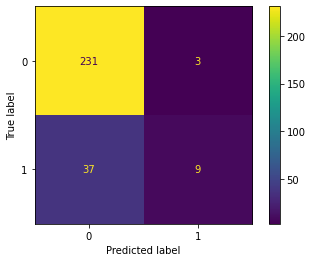

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(rf,X_test,y_test)

In [ ]:
metric_df = pd.DataFrame(columns=['Model','Accuracy','Precision','Recall','f1_Score'])

In [ ]:
metric_df.loc[len(metric_df)] = (['Base RF',metrics.accuracy_score(y_test,y_pred),metrics.precision_score(y_test,y_pred)
                 ,metrics.recall_score(y_test,y_pred),metrics.f1_score(y_test,y_pred)])
metric_df

,Model,Accuracy,Precision,Recall,f1_Score
0,Base RF,0.8571,0.7500,0.1957,0.3103


## Hyperparameter tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

grid_params = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
               'min_samples_split':  [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False],
               'random_state':[42]}

rf_gs = RandomizedSearchCV(RandomForestClassifier(), grid_params,verbose=3, n_jobs = -1,scoring='recall',cv=3,n_iter=10)
rf_gs.fit(X_train, y_train)
rf_gs.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


{'random_state': 42,
 'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 60,
 'bootstrap': False}

In [ ]:
rf_gs = RandomForestClassifier(random_state = 42,
                               n_estimators = 1600,
                               min_samples_split = 5,
                               min_samples_leaf = 1,
                               max_features = 'sqrt',
                               max_depth = 30, 
                               bootstrap = False)

rf_gs.fit(X_train,y_train)
y_gs_pred = rf_gs.predict(X_test)
print("Accuracy : ",accuracy_score(y_test,y_gs_pred))
print("Precision : ",precision_score(y_test,y_gs_pred))
print("Recall : ",recall_score(y_test,y_gs_pred))
print("f1 score : ",f1_score(y_test,y_gs_pred))

Accuracy :  0.85
Precision :  0.6428571428571429
Recall :  0.1956521739130435
f1 score :  0.30000000000000004


In [ ]:
metric_df.loc[len(metric_df)] = (['RF Optimized',
                                  metrics.accuracy_score(y_test,y_gs_pred),
                                  metrics.precision_score(y_test,y_gs_pred),
                                  metrics.recall_score(y_test,y_gs_pred),
                                  metrics.f1_score(y_test,y_gs_pred)])
metric_df

,Model,Accuracy,Precision,Recall,f1_Score
0,Base RF,0.8571,0.7500,0.1957,0.3103
1,RF Optimized,0.8500,0.6429,0.1957,0.3000


In [ ]:
f_imp = pd.DataFrame(list(zip(rf_gs.feature_names_in_,rf_gs.feature_importances_)),columns=['Features','Importance'])
f_imp

,Features,Importance
0,Age,0.0672
1,BusinessTravel,0.0210
2,DailyRate,0.0572
3,DistanceFromHome,0.0452
4,EnvironmentSatisfaction,0.0314
5,HourlyRate,0.0521
6,JobInvolvement,0.0234
7,JobLevel,0.0232
8,JobSatisfaction,0.0259
9,MonthlyIncome,0.0815


In [ ]:
rf_top_feat = list(f_imp.sort_values(by='Importance',ascending=False)[0:10]['Features'])
rf_top_feat

['MonthlyIncome',
 'OverTime_Yes',
 'Age',
 'DailyRate',
 'HourlyRate',
 'TotalWorkingYears',
 'MonthlyRate',
 'DistanceFromHome',
 'YearsAtCompany',
 'YearsWithCurrManager']

## Random Forest on top 10 features

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

grid_params = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
               'min_samples_split':  [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False],
               'random_state':[42]}

rf_gs_top_feat = RandomizedSearchCV(RandomForestClassifier(), grid_params,verbose=3, n_jobs = -1,scoring='recall',cv=3)
rf_gs_top_feat.fit(X_train[rf_top_feat], y_train)
rf_gs_top_feat.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


{'random_state': 42,
 'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 40,
 'bootstrap': False}

In [ ]:
rf_gs_top_feat = RandomForestClassifier(random_state = 42,
                               n_estimators = 1800,
                               min_samples_split = 2,
                               min_samples_leaf = 4,
                               max_features = 'sqrt',
                               max_depth = 110, 
                               bootstrap = False)

rf_gs_top_feat.fit(X_train[rf_top_feat],y_train)
y_gs_pred_top_feat = rf_gs_top_feat.predict(X_test[rf_top_feat])
print("Accuracy : ",accuracy_score(y_test,y_gs_pred_top_feat))
print("Precision : ",precision_score(y_test,y_gs_pred_top_feat))
print("Recall : ",recall_score(y_test,y_gs_pred_top_feat))
print("f1 score : ",f1_score(y_test,y_gs_pred_top_feat))

Accuracy :  0.85
Precision :  0.625
Recall :  0.21739130434782608
f1 score :  0.3225806451612903


In [ ]:
metric_df.loc[len(metric_df)] = (['RF top features',
                                  metrics.accuracy_score(y_test,y_gs_pred_top_feat),
                                  metrics.precision_score(y_test,y_gs_pred_top_feat),
                                  metrics.recall_score(y_test,y_gs_pred_top_feat),
                                  metrics.f1_score(y_test,y_gs_pred_top_feat)])
metric_df

,Model,Accuracy,Precision,Recall,f1_Score
0,Base RF,0.8571,0.7500,0.1957,0.3103
1,RF Optimized,0.8500,0.6429,0.1957,0.3000
2,RF top features,0.8500,0.6250,0.2174,0.3226


# AdaBoost 

In [ ]:
adb = AdaBoostClassifier(random_state=42)
adb.fit(X_train,y_train)
y_pred = adb.predict(X_test)

In [ ]:
print("Accuracy : ",accuracy_score(y_test,y_pred))
print("Precision : ",precision_score(y_test,y_pred))
print("Recall : ",recall_score(y_test,y_pred))
print("f1 score : ",f1_score(y_test,y_pred))

Accuracy :  0.875
Precision :  0.6410256410256411
Recall :  0.5434782608695652
f1 score :  0.5882352941176471


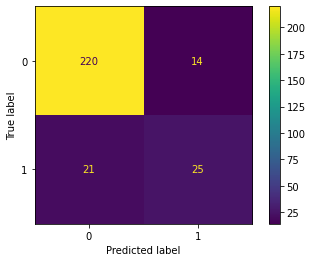

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(adb,X_test,y_test)

In [ ]:
metric_df.loc[len(metric_df)] = (['Base ADB',
                                  metrics.accuracy_score(y_test,y_pred),
                                  metrics.precision_score(y_test,y_pred),
                                  metrics.recall_score(y_test,y_pred),
                                  metrics.f1_score(y_test,y_pred)])
metric_df

,Model,Accuracy,Precision,Recall,f1_Score
0,Base RF,0.8571,0.7500,0.1957,0.3103
1,RF Optimized,0.8500,0.6429,0.1957,0.3000
2,RF top features,0.8500,0.6250,0.2174,0.3226
3,Base ADB,0.8750,0.6410,0.5435,0.5882


## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

grid_params = {'n_estimators': [int(x) for x in np.linspace(start = 50, stop = 2000, num = 40)],
               'learning_rate': [np.round(x,2) for x in np.linspace(0, 0.5, num = 11)],
               'algorithm': ['SAMME', 'SAMME.R'],
               'random_state':[42]}

adb_gs = RandomizedSearchCV(AdaBoostClassifier(), grid_params,verbose=3, n_jobs = -1,scoring='f1',cv=3)
adb_gs.fit(X_train, y_train)
adb_gs.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


{'random_state': 42,
 'n_estimators': 1600,
 'learning_rate': 0.25,
 'algorithm': 'SAMME.R'}

In [ ]:
adb_gs = AdaBoostClassifier(random_state = 42,
                                n_estimators = 1850,
                                learning_rate = 0.15,
                                algorithm =  'SAMME.R')

adb_gs.fit(X_train,y_train)
y_gs_pred = adb_gs.predict(X_test)

In [ ]:
print("Accuracy : ",accuracy_score(y_test,y_gs_pred))
print("Precision : ",precision_score(y_test,y_gs_pred))
print("Recall : ",recall_score(y_test,y_gs_pred))
print("f1 score : ",f1_score(y_test,y_gs_pred))

Accuracy :  0.8892857142857142
Precision :  0.6829268292682927
Recall :  0.6086956521739131
f1 score :  0.6436781609195402


In [ ]:
metric_df.loc[len(metric_df)] = (['ADB Optimized',
                                  metrics.accuracy_score(y_test,y_gs_pred),
                                  metrics.precision_score(y_test,y_gs_pred),
                                  metrics.recall_score(y_test,y_gs_pred),
                                  metrics.f1_score(y_test,y_gs_pred)])

metric_df

,Model,Accuracy,Precision,Recall,f1_Score
0,Base RF,0.8571,0.7500,0.1957,0.3103
1,RF Optimized,0.8500,0.6429,0.1957,0.3000
2,RF top features,0.8500,0.6250,0.2174,0.3226
3,Base ADB,0.8750,0.6410,0.5435,0.5882
4,ADB Optimized,0.8893,0.6829,0.6087,0.6437


## Adaboost on top features

In [ ]:
f_imp = pd.DataFrame(list(zip(adb_gs.feature_names_in_,adb_gs.feature_importances_)),columns=['Features','Importance'])

adb_top_feat = list(f_imp.sort_values(by='Importance',ascending=False)[0:10]['Features'])

In [ ]:
rf_top_feat

['MonthlyIncome',
 'OverTime_Yes',
 'Age',
 'DailyRate',
 'HourlyRate',
 'TotalWorkingYears',
 'MonthlyRate',
 'DistanceFromHome',
 'YearsAtCompany',
 'YearsWithCurrManager']

In [ ]:
adb_top_feat

['DailyRate',
 'MonthlyIncome',
 'MonthlyRate',
 'HourlyRate',
 'Age',
 'PercentSalaryHike',
 'YearsAtCompany',
 'OverTime_Yes',
 'YearsWithCurrManager',
 'StockOptionLevel']

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

grid_params = {'n_estimators': [int(x) for x in np.linspace(start = 50, stop = 2000, num = 40)],
               'learning_rate': [np.round(x,2) for x in np.linspace(0, 0.5, num = 11)],
               'algorithm': ['SAMME', 'SAMME.R'],
               'random_state':[42]}

adb_gs_top_feat = RandomizedSearchCV(AdaBoostClassifier(), grid_params,verbose=3, n_jobs = -1,scoring='f1',cv=3)
adb_gs_top_feat.fit(X_train[adb_top_feat], y_train)
adb_gs_top_feat.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


{'random_state': 42,
 'n_estimators': 1350,
 'learning_rate': 0.3,
 'algorithm': 'SAMME'}

In [ ]:
adb_gs_top_feat = AdaBoostClassifier(random_state = 42,
                                n_estimators = 550,
                                learning_rate = 0.15,
                                algorithm =  'SAMME.R')

adb_gs_top_feat.fit(X_train[adb_top_feat],y_train)
y_gs_pred_top_feat = adb_gs_top_feat.predict(X_test[adb_top_feat])

In [ ]:
print("Accuracy : ",accuracy_score(y_test,y_gs_pred_top_feat))
print("Precision : ",precision_score(y_test,y_gs_pred_top_feat))
print("Recall : ",recall_score(y_test,y_gs_pred_top_feat))
print("f1 score : ",f1_score(y_test,y_gs_pred_top_feat))

Accuracy :  0.8392857142857143
Precision :  0.5217391304347826
Recall :  0.2608695652173913
f1 score :  0.3478260869565218


In [ ]:
metric_df.loc[len(metric_df)] = (['ADB top features',
                                  metrics.accuracy_score(y_test,y_gs_pred_top_feat),
                                  metrics.precision_score(y_test,y_gs_pred_top_feat),
                                  metrics.recall_score(y_test,y_gs_pred_top_feat),
                                  metrics.f1_score(y_test,y_gs_pred_top_feat)])
metric_df

,Model,Accuracy,Precision,Recall,f1_Score
0,Base RF,0.8571,0.7500,0.1957,0.3103
1,RF Optimized,0.8500,0.6429,0.1957,0.3000
2,RF top features,0.8500,0.6250,0.2174,0.3226
3,Base ADB,0.8750,0.6410,0.5435,0.5882
4,ADB Optimized,0.8893,0.6829,0.6087,0.6437
5,ADB top features,0.8393,0.5217,0.2609,0.3478


## XGBOOST

In [ ]:
spw = emp_df['Attrition'].value_counts()[0]/emp_df['Attrition'].value_counts()[1]
spw

5.069565217391304

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42,scale_pos_weight=spw)
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)

[21:01:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
print("Accuracy : ",accuracy_score(y_test,y_pred))
print("Precision : ",precision_score(y_test,y_pred))
print("Recall : ",recall_score(y_test,y_pred))
print("f1 score : ",f1_score(y_test,y_pred))

Accuracy :  0.8714285714285714
Precision :  0.6190476190476191
Recall :  0.5652173913043478
f1 score :  0.5909090909090909


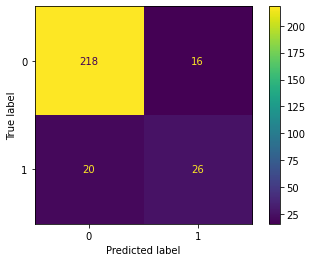

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xgb,X_test,y_test)

In [ ]:
metric_df.loc[len(metric_df)] = (['Base XGB',
                                  metrics.accuracy_score(y_test,y_pred),
                                  metrics.precision_score(y_test,y_pred),
                                  metrics.recall_score(y_test,y_pred),
                                  metrics.f1_score(y_test,y_pred)])
metric_df

,Model,Accuracy,Precision,Recall,f1_Score
0,Base RF,0.8571,0.7500,0.1957,0.3103
1,RF Optimized,0.8500,0.6429,0.1957,0.3000
2,RF top features,0.8500,0.6250,0.2174,0.3226
3,Base ADB,0.8750,0.6410,0.5435,0.5882
4,ADB Optimized,0.8893,0.6829,0.6087,0.6437
5,ADB top features,0.8393,0.5217,0.2609,0.3478
6,Base XGB,0.8714,0.6190,0.5652,0.5909


## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

grid_params = {'n_estimators': [int(x) for x in np.linspace(start = 50, stop = 500, num = 19)],
               'eta': [np.round(x,2) for x in np.linspace(0, 0.5, num = 11)],
               "subsample":[np.round(x,2) for x in np.linspace(0.5, 1, num = 11)],
               "colsample_bytree":[np.round(x,2) for x in np.linspace(0.5, 1, num = 11)],
               "max_depth":[int(x) for x in np.linspace(2, 20, num = 10)],
               "min_child_weight":[int(x) for x in np.linspace(1, 20, num = 20)],
               "gamma" : [i/10.0 for i in range(0,6)],
               "scale_pos_weight" : [spw],
              "random_state":[42]}

xgb_gs = RandomizedSearchCV(XGBClassifier(), grid_params,verbose=3, n_jobs = -1,scoring='f1',cv=3,n_iter=10)
xgb_gs.fit(X_train, y_train)
xgb_gs.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[21:04:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'subsample': 0.95,
 'scale_pos_weight': 5.069565217391304,
 'random_state': 42,
 'n_estimators': 425,
 'min_child_weight': 15,
 'max_depth': 18,
 'gamma': 0.4,
 'eta': 0.05,
 'colsample_bytree': 0.85}

In [ ]:
xgb_gs = XGBClassifier(
 subsample= 0.95,
 scale_pos_weight= 5.069565217391304,
 random_state= 42,
 n_estimators= 425,
 min_child_weight= 15,
 max_depth= 18,
 gamma= 0.4,
 eta= 0.05,
 colsample_bytree= 0.85)

xgb_gs.fit(X_train,y_train)
y_gs_pred = xgb_gs.predict(X_test)
print("Accuracy : ",accuracy_score(y_test,y_gs_pred))
print("Precision : ",precision_score(y_test,y_gs_pred))
print("Recall : ",recall_score(y_test,y_gs_pred))
print("f1 score : ",f1_score(y_test,y_gs_pred))

[21:05:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy :  0.8821428571428571
Precision :  0.6226415094339622
Recall :  0.717391304347826
f1 score :  0.6666666666666666


In [ ]:
metric_df.loc[len(metric_df)] = (['XGB Optimized',
                                  metrics.accuracy_score(y_test,y_gs_pred),
                                  metrics.precision_score(y_test,y_gs_pred),
                                  metrics.recall_score(y_test,y_gs_pred),
                                  metrics.f1_score(y_test,y_gs_pred)])
metric_df

,Model,Accuracy,Precision,Recall,f1_Score
0,Base RF,0.8571,0.7500,0.1957,0.3103
1,RF Optimized,0.8500,0.6429,0.1957,0.3000
2,RF top features,0.8500,0.6250,0.2174,0.3226
3,Base ADB,0.8750,0.6410,0.5435,0.5882
4,ADB Optimized,0.8893,0.6829,0.6087,0.6437
5,ADB top features,0.8393,0.5217,0.2609,0.3478
6,Base XGB,0.8714,0.6190,0.5652,0.5909
7,XGB Optimized,0.8821,0.6226,0.7174,0.6667


## Xgboost on top features

In [ ]:
feature_important = xgb_gs.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())
fimp_df = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
fimp_df

,score
DailyRate,438.0000
MonthlyIncome,429.0000
MonthlyRate,311.0000
HourlyRate,284.0000
Age,280.0000
DistanceFromHome,203.0000
PercentSalaryHike,170.0000
EnvironmentSatisfaction,147.0000
JobSatisfaction,139.0000
YearsAtCompany,135.0000


In [ ]:
xgb_top_feat = list(fimp_df['score'][0:10].index)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

grid_params = {'n_estimators': [int(x) for x in np.linspace(start = 50, stop = 500, num = 19)],
               'eta': [np.round(x,2) for x in np.linspace(0, 0.5, num = 11)],
               "subsample":[np.round(x,2) for x in np.linspace(0.5, 1, num = 11)],
               "colsample_bytree":[np.round(x,2) for x in np.linspace(0.5, 1, num = 11)],
               "max_depth":[int(x) for x in np.linspace(2, 20, num = 10)],
               "min_child_weight":[int(x) for x in np.linspace(1, 20, num = 20)],
               "gamma" : [i/10.0 for i in range(0,6)],
               "scale_pos_weight" : [spw],
              "random_state":[42]}

xgb_gs_imp_feat = RandomizedSearchCV(XGBClassifier(), grid_params,verbose=3, n_jobs = -1,scoring='f1',cv=3)
xgb_gs_imp_feat.fit(X_train[xgb_top_feat], y_train)
xgb_gs_imp_feat.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[21:18:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'subsample': 0.9,
 'scale_pos_weight': 5.069565217391304,
 'random_state': 42,
 'n_estimators': 225,
 'min_child_weight': 18,
 'max_depth': 6,
 'gamma': 0.3,
 'eta': 0.2,
 'colsample_bytree': 0.55}

In [ ]:
xgb_gs_imp_feat = XGBClassifier(
 subsample= 0.9,
 scale_pos_weight= 5.069565217391304,
 random_state= 42,
 n_estimators= 225,
 min_child_weight= 18,
 max_depth= 6,
 gamma= 0.3,
 eta= 0.2,
 colsample_bytree= 0.55)

xgb_gs_imp_feat.fit(X_train[xgb_top_feat],y_train)

y_pred_imp_feat = xgb_gs_imp_feat.predict(X_test[xgb_top_feat])

print("Accuracy : ",accuracy_score(y_test,y_pred_imp_feat))
print("Precision : ",precision_score(y_test,y_pred_imp_feat))
print("Recall : ",recall_score(y_test,y_pred_imp_feat))
print("f1 score : ",f1_score(y_test,y_pred_imp_feat))

[21:21:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy :  0.8142857142857143
Precision :  0.43478260869565216
Recall :  0.43478260869565216
f1 score :  0.43478260869565216


In [ ]:
metric_df.loc[len(metric_df)] = (['XGB Top Features',
                                  metrics.accuracy_score(y_test,y_pred_imp_feat),
                                  metrics.precision_score(y_test,y_pred_imp_feat),
                                  metrics.recall_score(y_test,y_pred_imp_feat),
                                  metrics.f1_score(y_test,y_pred_imp_feat)])
metric_df

,Model,Accuracy,Precision,Recall,f1_Score
0,Base RF,0.8571,0.7500,0.1957,0.3103
1,RF Optimized,0.8500,0.6429,0.1957,0.3000
2,RF top features,0.8500,0.6250,0.2174,0.3226
3,Base ADB,0.8750,0.6410,0.5435,0.5882
4,ADB Optimized,0.8893,0.6829,0.6087,0.6437
5,ADB top features,0.8393,0.5217,0.2609,0.3478
6,Base XGB,0.8714,0.6190,0.5652,0.5909
7,XGB Optimized,0.8821,0.6226,0.7174,0.6667
8,XGB Top Features,0.8143,0.4348,0.4348,0.4348


In [ ]:
import shap
explainer = shap.Explainer(xgb_gs.predict, X_test)
shap_values = explainer(X_test)

Permutation explainer: 281it [00:42,  5.24it/s]                                                                                                                                                                   


findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.


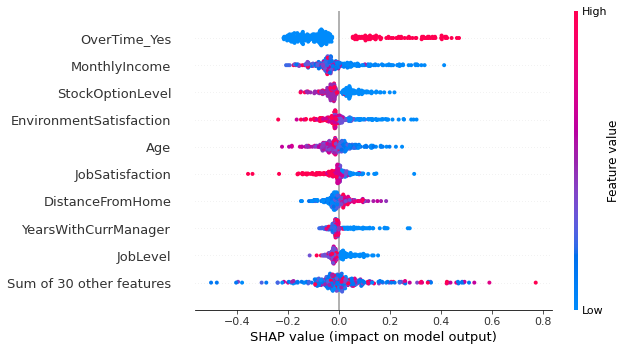

In [ ]:
shap.plots.beeswarm(shap_values)

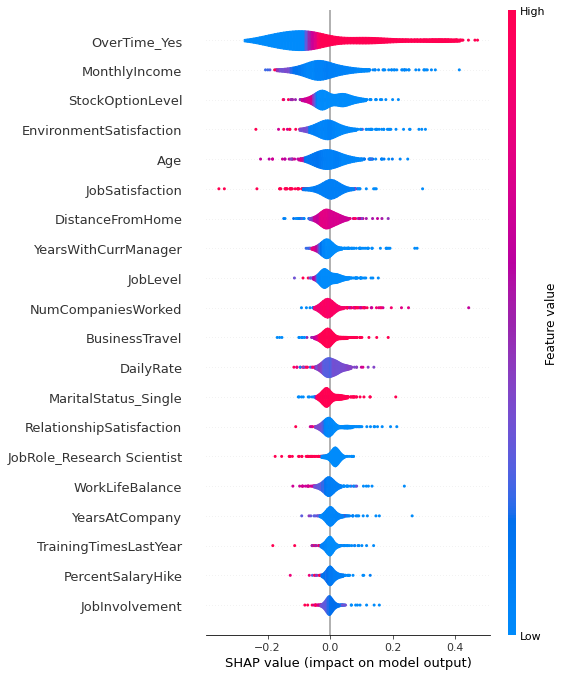

In [ ]:
shap.summary_plot(shap_values, plot_type='violin')